# Determination of patterns that form the success of the game with statistical analysis

![](https://i.ibb.co/xCpytvS/pixel-art-book-okraska-pikseley-256.png)

**Context**. 

Motivated by Gregory Smith's web scrape of VGChartz Video Games Sales, this data set simply extends the number of variables with another web scrape from Metacritic. Unfortunately, there are missing observations as Metacritic only covers a subset of the platforms. Also, a game may not have all the observations of the additional variables discussed below. Complete cases are ~ 6,900



https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings/code

## General information about data

### Loading and previewing data

In [1]:
!gdown --id 1T-Quqcapq9ylT_gp9m_iiu6tu8aY_9j4

Downloading...
From: https://drive.google.com/uc?id=1T-Quqcapq9ylT_gp9m_iiu6tu8aY_9j4
To: /content/Video_Games_Sales_as_at_22_Dec_2016.csv
100% 1.62M/1.62M [00:00<00:00, 50.1MB/s]


In [43]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns
from scipy import stats as st
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

In [4]:
game_df = pd.read_csv('/content/Video_Games_Sales_as_at_22_Dec_2016.csv')
game_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
game_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16450.0,2006.487356,5.878995,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16719.0,0.263330,0.813514,0.00,0.00,0.08,0.24,41.36
EU_Sales,16719.0,0.145025,0.503283,0.00,0.00,0.02,0.11,28.96
JP_Sales,16719.0,0.077602,0.308818,0.00,0.00,0.00,0.04,10.22
Other_Sales,16719.0,0.047332,0.186710,0.00,0.00,0.01,0.03,10.57
Global_Sales,16719.0,0.533543,1.547935,0.01,0.06,0.17,0.47,82.53
Critic_Score,8137.0,68.967679,13.938165,13.00,60.00,71.00,79.00,98.00
Critic_Count,8137.0,26.360821,18.980495,3.00,12.00,21.00,36.00,113.00
User_Count,7590.0,162.229908,561.282326,4.00,10.00,24.00,81.00,10665.00


We observe gaps in the `Year_of_Release`,` Critic_score`, `User_score`,` Rating` columns and minor gaps in the `Name` and` Genre` columns. The most critical gaps in the rating and rating columns, which are needed for analysis. The date set contains information about games released since 1980 - perhaps these omissions are due to the fact that for earlier games - no ratings were given, incl. due to the undeveloped Internet network or the lack of clear criteria for the formation of the rating.

### Data Description
- **Name** - the name of the game
- **Platform** - platform
- **Year_of_Release** - year of release
- **Genre** - game genre
- **Publisher** - game genre
- **NA_sales** - North American sales (millions of copies sold)
- **EU_sales** - sales in Europe (millions of copies sold)
- **JP_sales** - sales in Japan (millions of copies sold)
- **Other_sales** - sales in other countries (millions of copies sold)
- **Global_sales** - sales in other countries (millions of copies sold)
- **Critic_Score** - Critic score (maximum 100)
- **Critic_count** - The number of critics used in coming up with the Criticscore
- **User_Score** - user score (maximum 10)
- **Rating** - rating from the organization [ESRB](https://www.esrb.org/) (English Entertainment Software Rating Board).
- **Developer** - developer

- at first glance, no anomalies were found
- in the columns `Name`,` Year_of_Release`, `Genre`,` Critic_Score`, `User_Score`,` Rating` - there are gaps, especially in the columns of ratings / scores. We will study the passes and decide what to do with them.
- it is necessary to replace the data in the `Year_of_Release` column -` float` with `int`. `datetime` does not need to be entered
- for the rest of the columns, additional study is needed, for example: `User_Score` is of type object, so the column contains a non-numeric value

## Data preprocessing

### Replacing column names.

In [8]:
game_df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

Let's convert the column names to lowercase for ease of use

In [9]:
game_df.columns = game_df.columns.str.lower()
game_df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'critic_score',
       'critic_count', 'user_score', 'user_count', 'developer', 'rating'],
      dtype='object')

### The presence of duplicates in the data network.

In [10]:
game_df.duplicated().sum()

0

No duplicates were found. You need to go to passes and their processing

### Counting and Handling Gaps

In [11]:
game_df.isna().mean().sort_values(ascending=False)

user_count         0.546025
critic_count       0.513308
critic_score       0.513308
rating             0.404869
user_score         0.400981
developer          0.396136
year_of_release    0.016089
publisher          0.003230
genre              0.000120
name               0.000120
global_sales       0.000000
other_sales        0.000000
jp_sales           0.000000
eu_sales           0.000000
na_sales           0.000000
platform           0.000000
dtype: float64

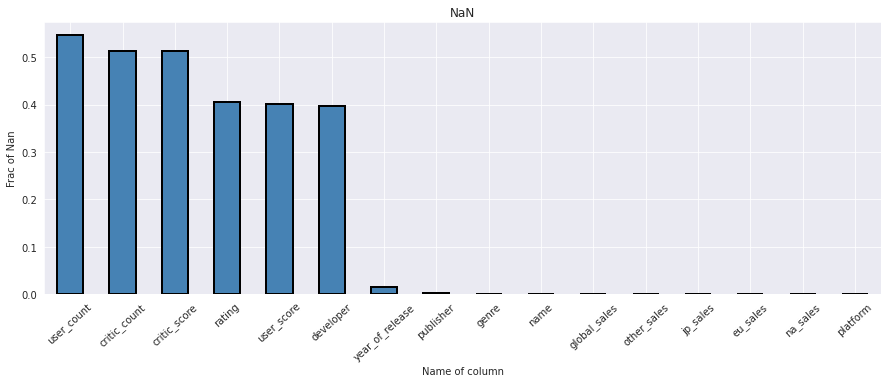

In [14]:
game_df.isna().mean().sort_values(ascending=False).plot(
                                                  kind='bar', figsize=(15,5), 
                                                  grid=True, color='steelblue', 
                                                  edgecolor='black', linewidth=2
                                                  , rot=42
                                                  )
plt.title('NaN')
plt.xlabel('Name of column')
plt.ylabel('Frac of Nan')
plt.show()

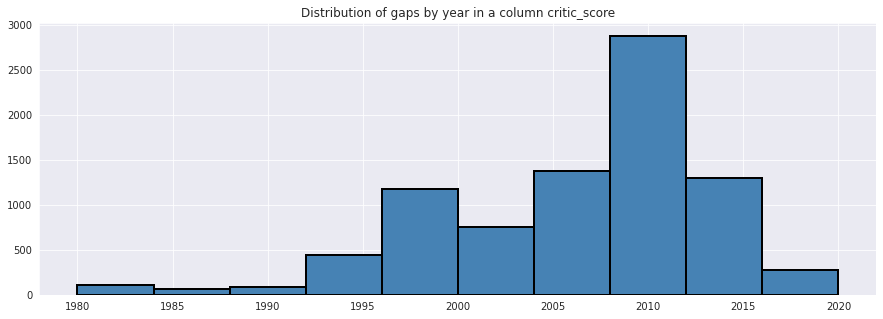

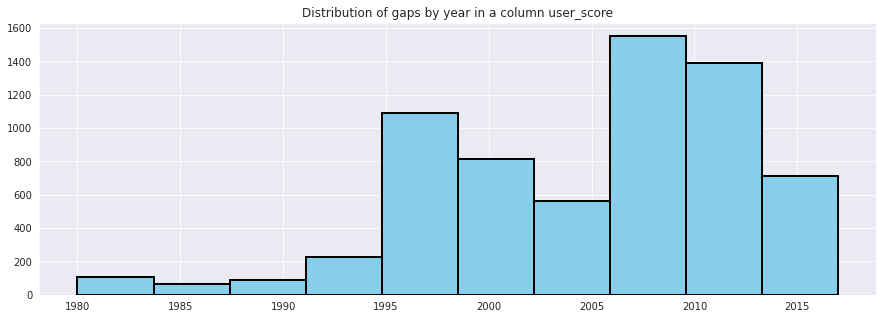

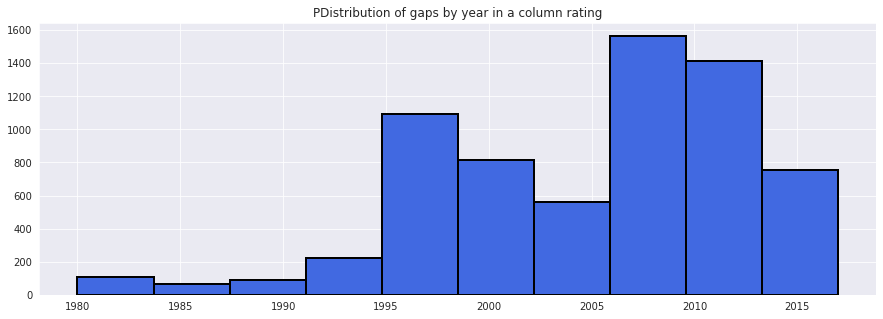

In [15]:
columns_list = ['critic_score', 'user_score', 'rating']
title_list = ['Distribution of gaps by year in a column critic_score', 
              'Distribution of gaps by year in a column user_score', 
              'Distribution of gaps by year in a column rating']

color_list=['steelblue', 'skyblue', 'royalblue']



for i in tqdm(range(len(columns_list))):
    plt.figure(figsize=(15, 5))
    plt.hist(game_df.loc[game_df[columns_list[i]].isna(), 'year_of_release'], 
            color=color_list[i], edgecolor='black', linewidth=2
            )
    plt.title(title_list[i])
    plt.xlabel('') 
    plt.show()

Unfortunately, most of the gaps have been observed since 2000. This cannot be attributed to the absence of a rating system.

#### Col `critic_score`

A large number of gaps in the column `critic_score`. Data not available due to unknown factors. The probability of missing is impossible to express based on the information contained in the dataset. Initially, it was taught that gaps were observed in older games, but surprisingly, the largest number of gaps has been observed since 2010.

Since there is no possibility to clarify, you can apply the indicator replacement of gaps, for example, by `-1`, but then the probability of an error in the cut increases - we can miss this fact

#### Col `user_score`

In [17]:
game_df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [19]:
print('tbd in the df:', len(game_df[game_df['user_score'] == 'tbd']), 'times')

tbd in the df: 2425 times


The value `tbd` is encountered. Because of this, the column is of type `object`.

[TBD](http://mobilradio.ru/information/vocabulary/tbd.htm) is an abbreviation of the English To Be Determined (to be determined) or To Be Decided (to be decided). It is used if some information has not yet been determined or a decision has not been made on the issue. The acronym is used to mark ambiguities or omissions that need to be filled in the requirements information

Let's proceed in the same way as `critic_score` - we accept tbd as Nan. We do not delete the gaps. It would be possible to apply the indicator method of replacing gaps - but this increases the risks of inaccurate analysis.

In [20]:
game_df['user_score'] = game_df['user_score'].replace('tbd', np.nan)
print('Nan in the column user_score - {}'.format(
                                                                game_df['user_score'].isna().sum())
                                                                )


Nan in the column user_score - 9129


#### Col `rating`

In [21]:
game_df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

[Note](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board):  

- **"EC" ("Early childhood")** - "For Young Children": The game is suitable for children aged 3 years and older and does not contain materials that parents might find inappropriate. The products that have received this rating are originally designed for children and are usually educational games. Some advanced educational games may be rated "Everyone".
 
 
- **“E” (“Everyone”)** - “For everyone”: Content is quite suitable for the age group of 6 years and older; such games can also be enjoyed by adults. Games with this rating may contain minimal violence, mostly of a "cartoon" nature. The first game to receive this rating was The Simpsons Cartoon Studio, released in 1996. Originally "K-A" ("Kids to Adults")
  
  
- **“E10 +” (“Everyone 10 and older”)** - “For everyone 10 and older”: Projects with this rating may contain a little more cartoon or soft violence, or slightly explicit scenes or a minimum amount of blood. The rating was adopted by the ESRB on March 2, 2005. The first game to receive this rating was Donkey Kong: Jungle Beat.
  
  
- **"T" ("Teen")** - "Teens": This game is suitable for people aged 13 and over. Projects in this category may contain violence, obscene scenes, crude humor, moderately explicit sexual content, gore, or infrequent use.
  
  
- **"M" ("Mature")** - "For Adults": The game content is not suitable for teenagers under 17 years of age. Projects with this rating may contain quite violent violence, a large amount of gore with dismemberment, obscene sex scenes or gross profanity that is undesirable for a younger audience.
  
  
- ** "AO" ("Adults Only 18 +") ** - "Adults Only": Game content is only for adults over 18 years of age. Products in this category may contain prolonged violent and / or highly explicit sexual content, as well as nude scenes. Most of these games are designed for personal computers running Microsoft Windows and Apple Macintosh. The "Adults Only" rating is the subject of much debate, as it imposes serious restrictions on the sale of the game.
  
  
- **"RP" ("Rating Pending")** - "Rating Pending": The product has been submitted to ESRB and is pending a rating. This logo is used only on promotional presentations and in demo versions of games before the official release date.

In addition to the gaps, we found that we have several variants of names for the same rating level. It is necessary to rename `K-A` to` E`. `RP` - also equate to Nan, similar to tbd.

In this case, we will replace Nan with the value `RP`, since the column is of type` object`, we do not need numbers

In [22]:
game_df['rating'] = game_df['rating'].replace('K-A', 'E').fillna('RP')
print('Nan in the rating - {}'.format(
                                                                game_df['rating'].isna().sum())
                                                                )



Nan in the rating - 0


#### Col `year_of_release`

Let's see the number of omissions of the `year_of_release` column:

In [23]:
len(game_df[game_df['year_of_release'].isna()])

269

In [24]:
game_df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

269 gaps in the year column. You could do some research and restore the gaps, but that's 269 lines. Replace with `0`, after processing, create a new dataframe, excluding these lines

In [25]:
game_df['year_of_release'] = game_df['year_of_release'].fillna(0)
print('Nan in the year_of_release - {}'.format(
                                                                game_df['year_of_release'].isna().sum())
                                                                )

Nan in the year_of_release - 0


#### Col `name` и `genre`

In [26]:
print('Nan in the name', len(game_df[game_df['name'].isna()]))
print('Nan in the genre', len(game_df[game_df['genre'].isna()]))

Nan in the name 2
Nan in the genre 2


In [27]:
game_df[game_df['name'].isna()]

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,RP
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,RP


In [28]:
game_df[game_df['genre'].isna()]

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,RP
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,RP


Conducted research. It was not possible to detect and bind these parameters to the name of the game. Let's replace the name with `unknown`. We will not delete lines. Exclude from analysis via `query ()`

In [29]:
game_df['name'] = game_df['name'].fillna('unknown')
game_df['genre'] = game_df['genre'].fillna('Misc')
print('Nan in the name - {}'.format(
                                                       game_df['name'].isna().sum())
                                                       )
print('Nan in the genre - {}'.format(
                                                       game_df['genre'].isna().sum())
                                                       )


Nan in the name - 0
Nan in the genre - 0


In [30]:
game_df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Let's lowercase the column. replace `genre` with` misc`

In [31]:
game_df['genre'] = game_df['genre'].str.lower()

#### Converting data to other types

In [32]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16719 non-null  object 
 1   platform         16719 non-null  object 
 2   year_of_release  16719 non-null  float64
 3   genre            16719 non-null  object 
 4   publisher        16665 non-null  object 
 5   na_sales         16719 non-null  float64
 6   eu_sales         16719 non-null  float64
 7   jp_sales         16719 non-null  float64
 8   other_sales      16719 non-null  float64
 9   global_sales     16719 non-null  float64
 10  critic_score     8137 non-null   float64
 11  critic_count     8137 non-null   float64
 12  user_score       7590 non-null   object 
 13  user_count       7590 non-null   float64
 14  developer        10096 non-null  object 
 15  rating           16719 non-null  object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


For the convenience of work, the `user_score` score will be reduced to` 100-point`. Let's replace the data types in the columns `year_of_release`,` critic_score` with an integer one.

In [33]:


game_df['user_score'] = game_df['user_score'].astype('float64')
game_df['user_score'] = game_df['user_score'].apply(lambda x: x*10)



game_df['user_score'] = game_df['user_score'].replace(-10,-1)


columns_to_int = ['year_of_release', 'critic_score', 'user_score']
for column in columns_to_int:
    game_df[column] = game_df[game_df[column].notna()][column].astype('int64')
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16719 non-null  object 
 1   platform         16719 non-null  object 
 2   year_of_release  16719 non-null  int64  
 3   genre            16719 non-null  object 
 4   publisher        16665 non-null  object 
 5   na_sales         16719 non-null  float64
 6   eu_sales         16719 non-null  float64
 7   jp_sales         16719 non-null  float64
 8   other_sales      16719 non-null  float64
 9   global_sales     16719 non-null  float64
 10  critic_score     8137 non-null   float64
 11  critic_count     8137 non-null   float64
 12  user_score       7590 non-null   float64
 13  user_count       7590 non-null   float64
 14  developer        10096 non-null  object 
 15  rating           16719 non-null  object 
dtypes: float64(9), int64(1), object(6)
memory usage: 2.0+ MB


In [34]:

game_df_upd = game_df[game_df['year_of_release']!= 0]
game_df_upd.head(15)

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006,sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,RP
2,Mario Kart Wii,Wii,2008,racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,RP
5,Tetris,GB,1989,puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,RP
6,New Super Mario Bros.,DS,2006,platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,85.0,431.0,Nintendo,E
7,Wii Play,Wii,2006,misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,66.0,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009,platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,84.0,594.0,Nintendo,E
9,Duck Hunt,NES,1984,shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,RP


In [ ]:
game_df_upd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
 11  total_sales      16446 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


#### Conc

Prepared the data.

Column names were converted to lower case, the same was done with genres, data types were replaced, and gaps and duplicates were examined. The gaps worked, the lines decided not to delete, to exclude them via `query ()`

## Exploratory data analysis

### Analysis of the number and sales of released games for the entire period

Let's take a look at the general information on released games for different platforms by year of release:

In [35]:

game_cross = pd.crosstab(game_df_upd['platform'], 
            game_df_upd['year_of_release'], margins=True, 
            margins_name="Total", 
           ).T
game_cross

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne,Total
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
1981,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46
1982,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36
1983,11,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17
1984,1,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14
1985,1,0,0,0,1,0,0,0,0,0,0,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14
1986,2,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21
1987,6,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16
1988,2,0,0,0,0,1,0,0,0,0,0,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15


If we look at the `Total` column, we see that the gaming industry has been actively developing since 1994. It should be noted that the ESRP rating has been used since 1993. The peaks are in 2006 - 2011, then we see a decline and since 2012 some leveling off (from 500 to 652 games per year - close to the level of 2001 - 2006). This may be due to the development of games on mobile devices for Android or iOS - *mobile phones*, which are not in the list of platforms.

To simplify perception, we present a histogram grouped by name:

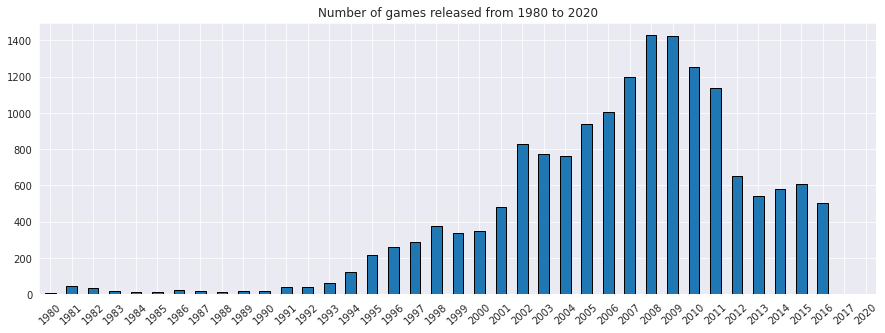

In [37]:
game_df_upd.groupby('year_of_release')['name'].count().plot(
            kind='bar', y='name', figsize=(15,5), edgecolor='black'
)
plt.title('Number of games released from 1980 to 2020')
plt.xticks(rotation=42)
plt.xlabel('')
plt.show()
    

Let's look at the sales of games on various platforms in the period under review.

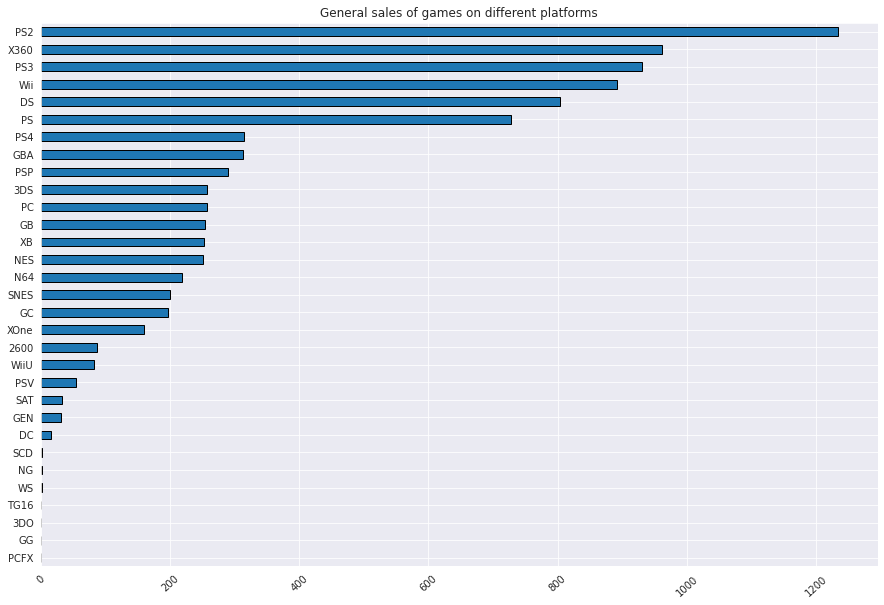

In [39]:
game_df_upd.groupby('platform')['global_sales'].sum().sort_values(ascending=True).plot(
            kind='barh', y='global_sales', figsize=(15,10), edgecolor='black'
)
plt.title('General sales of games on different platforms')
plt.xticks(rotation=42)
plt.xlabel('')
plt.ylabel('')
plt.show()
    

For convenience, let's highlight the top 10 sales platforms:

In [40]:
game_df_upd.groupby('platform')['global_sales'].sum().to_frame(
                                                        'global_sales').sort_values(
                                                        by='global_sales', ascending=False
                                                        ).head(10)

,global_sales
platform,
PS2,1233.46
X360,961.39
PS3,931.15
Wii,891.74
DS,803.73
PS,727.41
PS4,314.23
GBA,313.56
PSP,289.79


The leaders are PS2, PS3 and Xbox360. Wii and DS are also not far behind

In [41]:
list_of_platform = ['PS4', 'PC', '3DS', 'XOne']
games_not_new = game_df_upd.query('platform not in @list_of_platform').copy()
born_year = games_not_new.groupby('platform')['year_of_release'].agg(min)
deadline = games_not_new.groupby('platform')['year_of_release'].agg(max)
life_time = deadline - born_year
life_time.to_dict()
games_not_new['life_time'] = games_not_new['platform'].map(life_time)
games_not_new.head()


,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,life_time
0,Wii Sports,Wii,2006,sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80.0,322.0,Nintendo,E,10
1,Super Mario Bros.,NES,1985,platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,RP,11
2,Mario Kart Wii,Wii,2008,racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,Nintendo,E,10
3,Wii Sports Resort,Wii,2009,sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E,10
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,RP,13


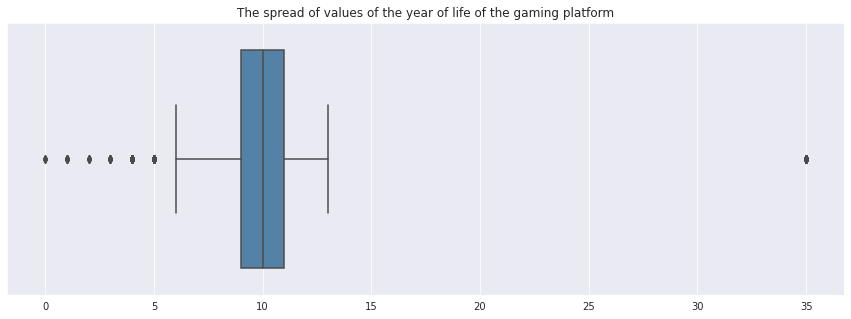

In [44]:
q75 = games_not_new['life_time'].quantile([.75])
q25 = games_not_new['life_time'].quantile([.25])
iqr = q75 - q25
low_range = q25 - (1.5 * iqr)
high_range = q75 + (1.5 * iqr)
plt.figure(figsize=(15, 5))
sns.boxplot(games_not_new['life_time'], color='steelblue')
plt.xlim = (low_range, high_range)
plt.title('The spread of values ​​of the year of life of the gaming platform')
plt.xlabel('')
plt.show()


Eliminate the outliers and look at the mean and median.

In [45]:
games_pivot = games_not_new.query('5 <= life_time <=15 ').pivot_table(index='platform', 
                         values='life_time').sort_values(
                         by='life_time', ascending=False
                        )
games_pivot.head(10)

,life_time
platform,
GB,13
PS2,11
X360,11
NES,11
PSP,11
PS3,10
Wii,10
DC,10
SNES,9


In [ ]:
print('Median platform lifetime: ', games_pivot['life_time'].median(), 'years')
print('Average platform lifetime: {:.1f}'.format(games_pivot['life_time'].mean()), 'years')


Long-lived platforms include DS, Xbox360, PS2 and PS3, Wii. The lifespan of the platform is 9 years based on this estimate. At the same time, it should be understood that this does not mean a period of release of new [generations of consoles](https://ru.wikipedia.org/wiki/%D0%98%D0%B3%D1%80%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BF%D1%80%D0%B8%D1%81%D1%82%D0%B0%D0%B2%D0%BA%D0%B0)- this means the time of release of games for these platforms. On average, generations change once every 7 years.

DS wins over with its mobility and possibly plays on the nostalgia of grown-up gamers. When calculating, we excluded PCs and modern consoles such as PS4, Xbox One, 3DS. The PC as a platform exists independently - the only difference is in the system requirements for games.

Let's see how sales have changed in relation to the number of games released.

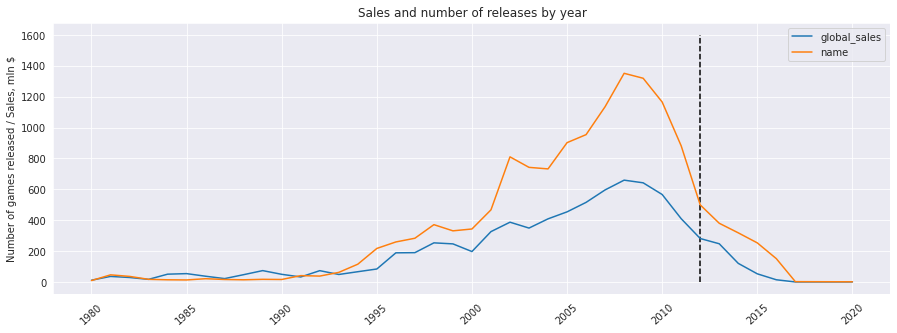

In [47]:
plt.figure(figsize=(15, 5))
ax = plt.gca()
games_not_new.groupby('year_of_release')['global_sales'].sum().plot(
                                                                 legend=True, 
                                                                 title='Sales and number of releases by year'
                                                                 )
games_not_new.groupby('year_of_release')['name'].count().plot(legend=True, grid=True)

plt.ylabel('Number of games released / Sales, mln $')
ax.vlines(x=2012, linestyle='--', color='black', ymin=0, ymax=1600)
plt.xticks(rotation=42)
plt.xlabel('')
plt.show()

#### Conc

We see that modern game production has been actively developing since 2001, and this affects the revenue. We assume that this is due to the active development of console platforms, an increase in the performance of gaming hardware, which causes an increased demand for video entertainment.
let's take the period from 2012 to 2016 - from the moment of a sharp drop in sales and the trend of a decrease in the number of games produced - in the year of the appearance of the first consoles [eighth generation](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B8%D0%B3%D1%80%D0%BE%D0%B2%D1%8B%D1%85_%D0%BA%D0%BE%D0%BD%D1%81%D0%BE%D0%BB%D0%B5%D0%B9#%D0%92%D0%BE%D1%81%D1%8C%D0%BC%D0%BE%D0%B5_%D0%BF%D0%BE%D0%BA%D0%BE%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_(%D1%81_2012))



### Analysis of the number and sales of released games for 2012-2016

In [48]:
games_12_16 = game_df_upd.query('year_of_release >=2012').reset_index(drop=True)
games_12_16.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Grand Theft Auto V,PS3,2013,action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,82.0,3994.0,Rockstar North,M
1,Grand Theft Auto V,X360,2013,action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,81.0,3711.0,Rockstar North,M
2,Call of Duty: Black Ops 3,PS4,2015,shooter,Activision,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN,NaN,NaN,RP
3,Pokemon X/Pokemon Y,3DS,2013,role-playing,Nintendo,5.28,4.19,4.35,0.78,14.60,NaN,NaN,NaN,NaN,NaN,RP
4,Call of Duty: Black Ops II,PS3,2012,shooter,Activision,4.99,5.73,0.65,2.42,13.79,83.0,21.0,53.0,922.0,Treyarch,M


In [49]:
games_12_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2890 non-null   object 
 1   platform         2890 non-null   object 
 2   year_of_release  2890 non-null   int64  
 3   genre            2890 non-null   object 
 4   publisher        2888 non-null   object 
 5   na_sales         2890 non-null   float64
 6   eu_sales         2890 non-null   float64
 7   jp_sales         2890 non-null   float64
 8   other_sales      2890 non-null   float64
 9   global_sales     2890 non-null   float64
 10  critic_score     1312 non-null   float64
 11  critic_count     1312 non-null   float64
 12  user_score       1531 non-null   float64
 13  user_count       1531 non-null   float64
 14  developer        1694 non-null   object 
 15  rating           2890 non-null   object 
dtypes: float64(9), int64(1), object(6)
memory usage: 361.4+ KB


In [50]:
pd.crosstab(games_12_16['platform'], 
            games_12_16['year_of_release'],
            margins=True, margins_name="total"
           ).sort_values(by='total', ascending=False)

year_of_release,2012,2013,2014,2015,2016,2017,2020,total
platform,,,,,,,,
total,653,544,581,606,502,3,1,2890
PS3,148,126,108,73,38,0,0,493
PSV,53,63,100,110,85,2,0,413
3DS,93,91,80,86,46,0,0,396
PS4,0,16,75,137,164,1,0,393
X360,106,75,63,35,13,0,0,292
PC,61,38,47,50,54,0,0,250
XOne,0,19,61,80,87,0,0,247
PSP,106,54,10,3,0,0,0,173


We see a decrease in the number of games created on the old generation consoles and an increase in production for new consoles: PS4, XOne, WiiU.

Among the portable consoles, the 3DS can be distinguished.
PS vita (PSV), PSP - we are seeing a decline

In [51]:
lead_platforms = ['PS4', 'PC', 'XOne', '3DS']
lead_games = games_12_16.query('platform in @lead_platforms')

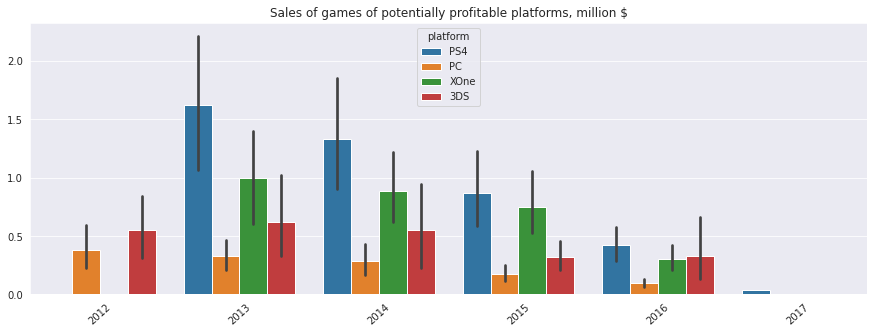

In [53]:
plt.figure(figsize=(15, 5))
sns.barplot(y='global_sales', 
            x='year_of_release', 
            hue='platform', 
            data = lead_games,
            hue_order = lead_platforms
           )

plt.title('Sales of games of potentially profitable platforms, million $')
plt.xticks(rotation=42)
plt.xlabel('')
plt.ylabel('')
plt.show()

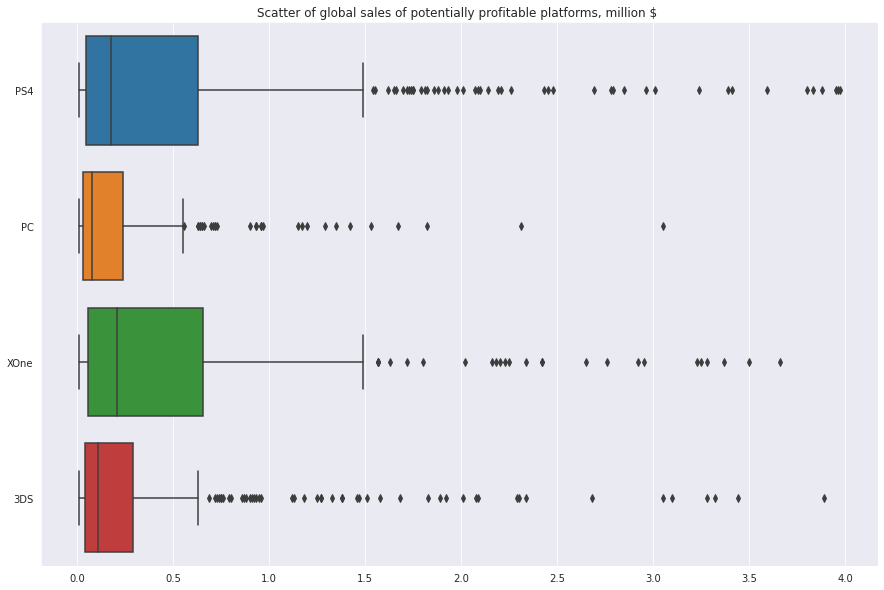

In [55]:
plt.figure(figsize=(15,10))

sns.boxplot(y='platform', x='global_sales',
            data = lead_games.query('global_sales < 4')
            ,order=lead_platforms, orient='h', 
           )
plt.title('Scatter of global sales of potentially profitable platforms, million $ ')
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Conc

Promising platforms are PS4, XOne, 3DS and PC. Despite the fact that we see a general decline - the leaders and the distribution of profits do not change. The PS4 and XOne are developing in about the same way, with the PS4 selling slightly better due to the availability of exclusive games, while Miscrosoft's policy is to play on the PC as well. The 3DS platform is also selling well, the PC is inferior to the console versions, which is associated with the need to update the * hardware * of the computer, which is much more expensive than buying a console

To eliminate outliers, when selecting values ​​for each platform, we will limit the total sales

### PS4. Impact of user reviews and critics.

In [56]:
ps4_df = games_12_16.loc[(games_12_16['global_sales'] < 4) 
                               & (games_12_16['platform']=='PS4')]
ps4_df.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
58,The Witcher 3: Wild Hunt,PS4,2015,role-playing,Namco Bandai Games,1.02,2.13,0.23,0.59,3.97,92.0,79.0,92.0,10179.0,CD Projekt Red Studio,M
59,Assassin's Creed: Unity,PS4,2014,action,Ubisoft,1.19,2.07,0.08,0.62,3.96,70.0,40.0,49.0,2050.0,"Ubisoft, Ubisoft Montreal",M
60,Batman: Arkham Knight,PS4,2015,action,Warner Bros. Interactive Entertainment,1.53,1.69,0.10,0.64,3.95,87.0,89.0,76.0,2679.0,Rocksteady Studios,M
62,NBA 2K16,PS4,2015,sports,Take-Two Interactive,2.49,0.66,0.03,0.69,3.88,87.0,51.0,67.0,364.0,Visual Concepts,E10+
63,Call of Duty: Ghosts,PS4,2013,shooter,Activision,1.78,1.43,0.05,0.57,3.83,78.0,49.0,37.0,1564.0,Infinity Ward,M


In [57]:
ps4_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 58 to 2838
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             376 non-null    object 
 1   platform         376 non-null    object 
 2   year_of_release  376 non-null    int64  
 3   genre            376 non-null    object 
 4   publisher        376 non-null    object 
 5   na_sales         376 non-null    float64
 6   eu_sales         376 non-null    float64
 7   jp_sales         376 non-null    float64
 8   other_sales      376 non-null    float64
 9   global_sales     376 non-null    float64
 10  critic_score     239 non-null    float64
 11  critic_count     239 non-null    float64
 12  user_score       244 non-null    float64
 13  user_count       244 non-null    float64
 14  developer        260 non-null    object 
 15  rating           376 non-null    object 
dtypes: float64(9), int64(1), object(6)
memory usage: 49.9+ KB


In [61]:
def heatmap_plot(data):

    plt.figure(figsize=(15,5))
    plt.title('Heatmap Correlation and Impact Distribution of Critics and Users')
    sns.heatmap(data[['global_sales', 'critic_score', 'user_score']].corr(), 
                annot=True, cmap='mako', fmt='.3f'
               )
    
    sns.jointplot(x='critic_score', y='global_sales', data=data, kind='scatter')
    sns.jointplot(x='user_score', y='global_sales', data=data, kind='scatter')
    plt.show()
   

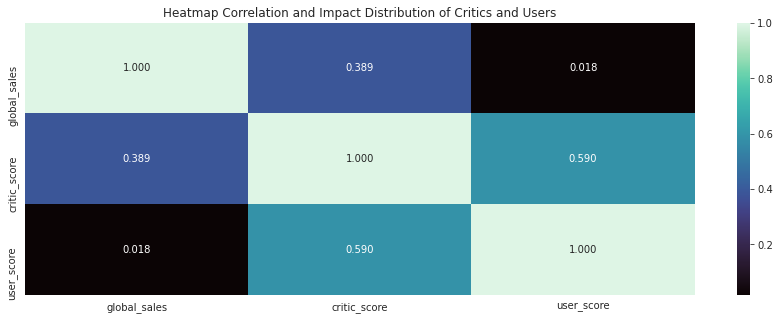

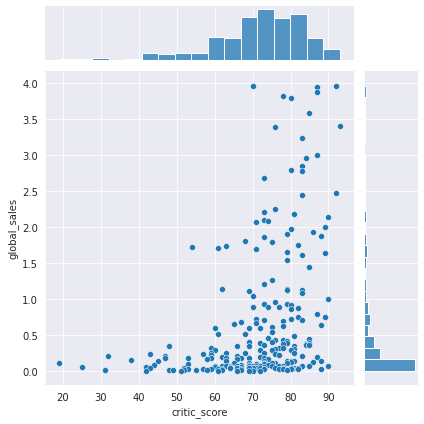

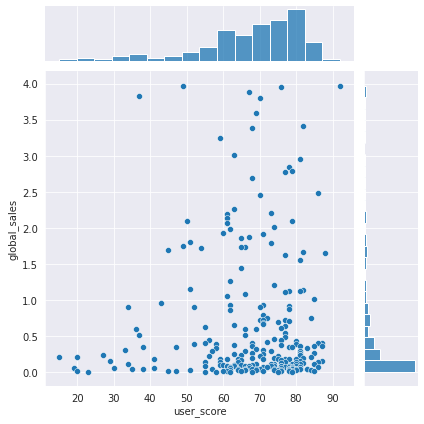

In [62]:
heatmap_plot(ps4_df)

We observe a positive (direct) correlation between critics' score and sales and user scores and sales. At the same time, the rating of critics is **LOW** correlates with sales, the rating of users is **VERY WEAK**. It is worth noting that there is an average correlation between the ratings of users and critics, which may be due to some influence of the rating of the critic on the opinion of some ordinary voting people. Distributions are asymmetric.

### XOne. Impact of user reviews and critics.

In [64]:
xone_df = games_12_16.loc[(games_12_16['global_sales'] < 4) 
                               & (games_12_16['platform']=='XOne')]
xone_df.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
66,Star Wars Battlefront (2015),XOne,2015,shooter,Electronic Arts,2.04,1.28,0.02,0.32,3.66,NaN,NaN,NaN,NaN,NaN,RP
69,Assassin's Creed: Unity,XOne,2014,action,Ubisoft,2.27,0.90,0.00,0.33,3.50,72.0,59.0,41.0,1005.0,"Ubisoft, Ubisoft Montreal",M
75,Destiny,XOne,2014,shooter,Activision,2.14,0.92,0.00,0.31,3.37,75.0,11.0,55.0,1735.0,"Bungie Software, Bungie",T
80,Gears of War: Ultimate Edition,XOne,2015,shooter,Microsoft Game Studios,2.61,0.33,0.00,0.34,3.28,82.0,74.0,75.0,563.0,"Splash Damage, The Coalition",M
81,FIFA 16,XOne,2015,sports,Electronic Arts,0.89,2.12,0.00,0.24,3.25,84.0,45.0,44.0,459.0,EA Sports,E


In [65]:
xone_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 66 to 2875
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             242 non-null    object 
 1   platform         242 non-null    object 
 2   year_of_release  242 non-null    int64  
 3   genre            242 non-null    object 
 4   publisher        242 non-null    object 
 5   na_sales         242 non-null    float64
 6   eu_sales         242 non-null    float64
 7   jp_sales         242 non-null    float64
 8   other_sales      242 non-null    float64
 9   global_sales     242 non-null    float64
 10  critic_score     165 non-null    float64
 11  critic_count     165 non-null    float64
 12  user_score       178 non-null    float64
 13  user_count       178 non-null    float64
 14  developer        190 non-null    object 
 15  rating           242 non-null    object 
dtypes: float64(9), int64(1), object(6)
memory usage: 32.1+ KB


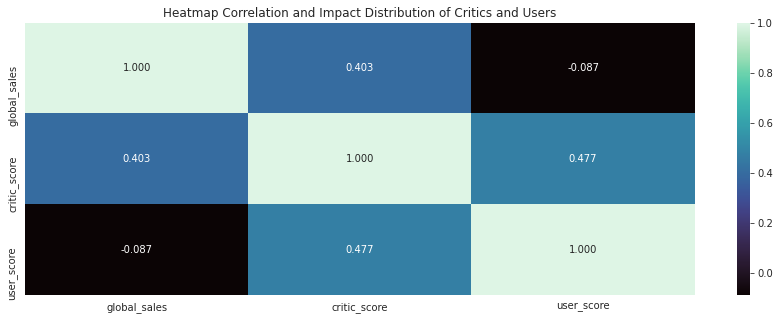

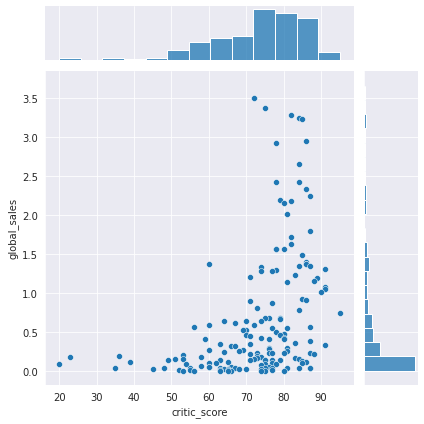

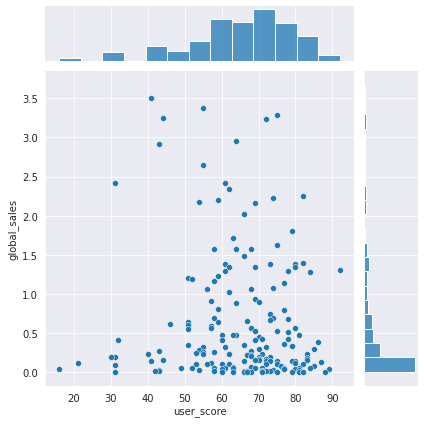

In [66]:
heatmap_plot(xone_df)

We observe a positive (direct) correlation between critics' ratings and sales and negative ones between user ratings and sales. At the same time, the rating of critics is **LOW** correlates with sales, the rating of users is **VERY WEAK**. It is worth noting that there is an average correlation between the ratings of users and critics, which may be due to some influence of the rating of the critic on the opinion of some ordinary voting people, but this influence is less than that of the PS4. Distributions are asymmetric.

### 3DS. Impact of user reviews and critics.

In [67]:
ds_df = games_12_16.loc[(games_12_16['global_sales'] < 4) 
                               & (games_12_16['platform']=='3DS')]
ds_df.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
61,Monster Hunter 4 Ultimate,3DS,2014,role-playing,Nintendo,0.68,0.48,2.62,0.11,3.89,86.0,80.0,87.0,348.0,Capcom,T
72,Monster Hunter 4,3DS,2013,role-playing,Capcom,0.00,0.00,3.44,0.00,3.44,NaN,NaN,NaN,NaN,NaN,RP
77,Monster Hunter X,3DS,2015,action,Capcom,0.27,0.21,2.79,0.05,3.32,NaN,NaN,NaN,NaN,NaN,RP
79,Yokai Watch 2 Ganso/Honke,3DS,2014,role-playing,Nintendo,0.09,0.00,3.18,0.01,3.28,NaN,NaN,NaN,NaN,NaN,RP
87,The Legend of Zelda: A Link Between Worlds,3DS,2013,action,Nintendo,1.40,1.01,0.46,0.23,3.10,91.0,81.0,89.0,1057.0,Nintendo,E


In [ ]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 61 to 2873
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             388 non-null    object 
 1   platform         388 non-null    object 
 2   year_of_release  388 non-null    int64  
 3   genre            388 non-null    object 
 4   na_sales         388 non-null    float64
 5   eu_sales         388 non-null    float64
 6   jp_sales         388 non-null    float64
 7   other_sales      388 non-null    float64
 8   critic_score     101 non-null    float64
 9   user_score       111 non-null    float64
 10  rating           388 non-null    object 
 11  total_sales      388 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 39.4+ KB


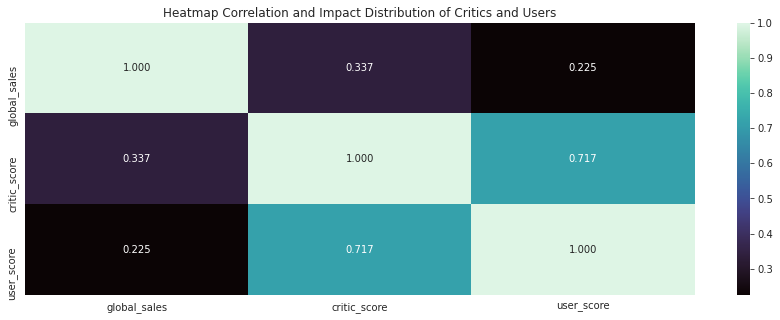

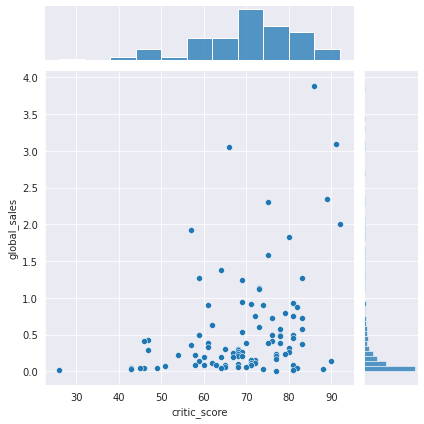

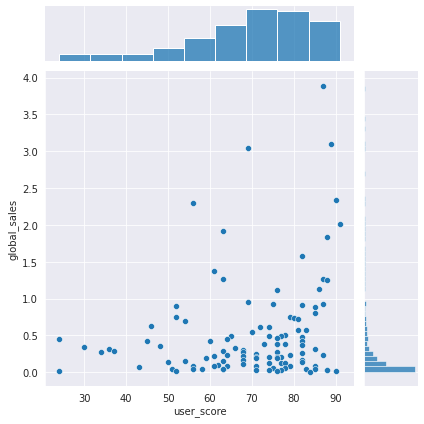

In [68]:
heatmap_plot(ds_df)

We observe a positive (direct) correlation between critics' score and sales and user scores and sales. At the same time, the rating of critics **VERY WEAK** correlates with sales, the rating of users is **VERY WEAK**. It is worth noting that there is an average correlation between the ratings of users and critics, which may be due to some influence of the rating of the critic on the opinion of some ordinary voting people.

### PC. Impact of user reviews and critics.

In [69]:
pc_df = games_12_16.loc[(games_12_16['global_sales'] < 3) 
                               & (games_12_16['platform']=='PC') 
                               & (games_12_16['critic_score']!=-1) 
                               & (games_12_16['user_score']!=-1)]
pc_df.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
122,Guild Wars 2,PC,2012,action,NCSoft,0.96,1.07,0.0,0.27,2.31,90.0,69.0,79.0,2954.0,ArenaNet,T
173,World of Warcraft: Mists of Pandaria,PC,2012,role-playing,Activision,0.84,0.76,0.0,0.22,1.82,82.0,42.0,48.0,1265.0,Blizzard Entertainment,T
196,StarCraft II: Heart of the Swarm,PC,2013,strategy,Activision,0.83,0.66,0.0,0.18,1.67,86.0,68.0,79.0,1346.0,Blizzard Entertainment,T
220,Call of Duty: Black Ops II,PC,2012,shooter,Activision,0.64,0.69,0.0,0.19,1.53,74.0,11.0,42.0,1635.0,Treyarch,M
233,SimCity (2013),PC,2013,simulation,Electronic Arts,0.48,0.77,0.0,0.17,1.42,64.0,75.0,22.0,4572.0,Maxis,E10+


In [70]:
pc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 122 to 2883
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             248 non-null    object 
 1   platform         248 non-null    object 
 2   year_of_release  248 non-null    int64  
 3   genre            248 non-null    object 
 4   publisher        248 non-null    object 
 5   na_sales         248 non-null    float64
 6   eu_sales         248 non-null    float64
 7   jp_sales         248 non-null    float64
 8   other_sales      248 non-null    float64
 9   global_sales     248 non-null    float64
 10  critic_score     196 non-null    float64
 11  critic_count     196 non-null    float64
 12  user_score       204 non-null    float64
 13  user_count       204 non-null    float64
 14  developer        212 non-null    object 
 15  rating           248 non-null    object 
dtypes: float64(9), int64(1), object(6)
memory usage: 32.9+ KB


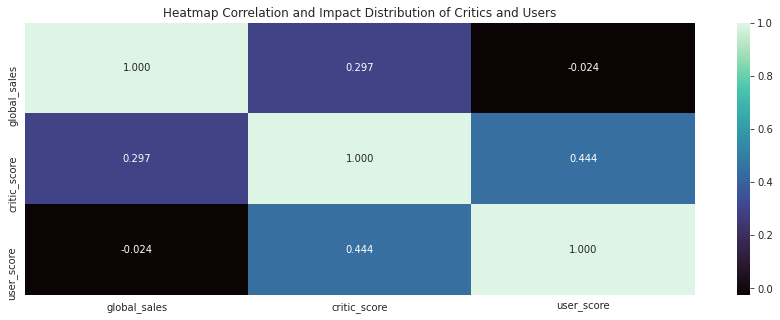

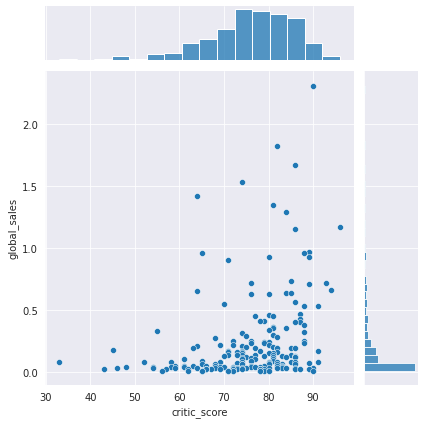

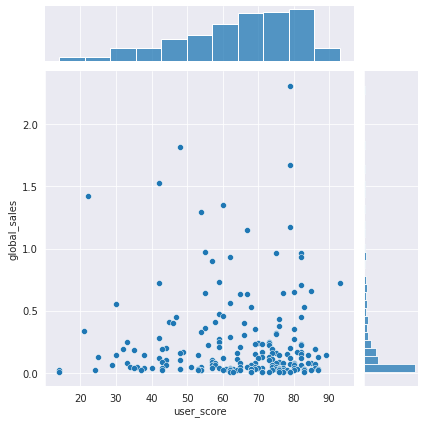

In [71]:
heatmap_plot(pc_df)

We observe a positive (direct) correlation between critics' score and sales and user scores and sales. At the same time, the rating of critics is **LOW** correlates with sales, the rating of users is **VERY WEAK**. Distributions are asymmetric.

Large projects with a large budget are often accompanied by an increased advertising campaign and promotion, which can have some impact on the assessment of critics, including from various major gaming publications. Also, the critic will evaluate the game often within the framework of a certain evaluation standard, according to strict metrics and indicators. The critic will be more objective.

When evaluating, users are guided by their own tasteful subjective presentation. There are times when large, critically acclaimed games are poorly accepted by users, who are becoming more demanding every year. The user is subjective.

However, the presence of an average correlation between the ratings of users and critics may indicate that there are times when the opinions of the parties coincide.

### Analysis of games by genre

In [72]:
top_games = games_12_16.pivot_table(index='genre',columns='year_of_release'
                        ,values='global_sales',aggfunc='sum').copy()
top_games

year_of_release,2012,2013,2014,2015,2016,2017,2020
genre,,,,,,,
action,119.10,122.57,97.30,72.04,30.23,0.01,NaN
adventure,5.80,6.07,5.61,8.15,3.83,NaN,NaN
fighting,9.20,7.04,15.83,7.92,4.44,NaN,NaN
misc,22.21,25.28,23.35,11.56,2.63,NaN,NaN
platform,18.37,24.59,8.78,6.06,3.21,NaN,NaN
puzzle,1.72,0.95,1.49,0.72,0.01,NaN,NaN
racing,13.68,12.33,16.64,8.07,2.83,NaN,NaN
role-playing,46.91,44.42,45.57,37.66,18.12,0.05,NaN
shooter,71.80,62.05,65.26,67.49,38.23,NaN,NaN


In [73]:
top_list = ['action', 'role-playing', 'shooter', 'sports', 'platform', 'misc']

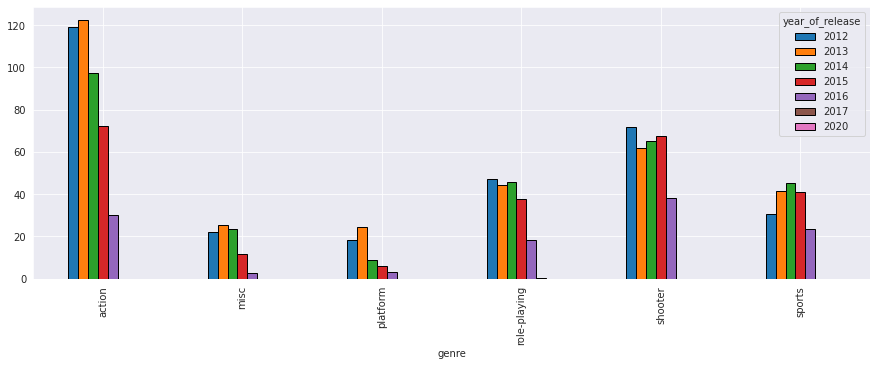

In [74]:
top_games.query('genre in @top_list').plot(kind='bar', figsize=(15,5), edgecolor='black')
plt.title('')
plt.show()

The most popular genres are action and shooter, but puzzle is disappearing completely. Also, the popular genres include RPG, platform and sports. The greatest drop in revenue was received by the action genre, shooter and RPG are developing more steadily

### Conc

The gaming industry has been actively developing since 1994. It should be noted that the ESRP rating has been used since 1993. The peaks are in 2006 - 2011, then we see a decline and since 2012 some leveling off (from 500 to 652 games per year - close to the level of 2001 - 2006). This may be due to the development of games on mobile devices for Android or iOs. Over the past years, the rate of development has been falling, and profits have been falling.


The median lifespan of the platform is 10 years, while the time cycle for the announcement of a new console is approximately 6-7 years.


Promising platforms are PS4, XOne, 3DS and PC. Despite the fact that we see a general decline - the leaders and the distribution of profits do not change. PS4 and XOne are developing in a similar fashion, with PS4 selling slightly better due to the availability of exclusive games, while Miscrosoft's policy is to play on PC as well. The 3DS platform is also selling well, the PC is inferior to the console versions, which is associated with the need to update the hardware of the computer, which is much more expensive than buying a console  

The biggest drop in revenue was seen in the action genre, shooter and RPG are developing more steadily. At the moment, shooter is among the best sellers, but approximately equal to action. Thus - users are interested in action, RPG and shooter

## EDA of video game users by region

For convenience, let's display our dataframe:

In [75]:
games_12_16.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Grand Theft Auto V,PS3,2013,action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,82.0,3994.0,Rockstar North,M
1,Grand Theft Auto V,X360,2013,action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,81.0,3711.0,Rockstar North,M
2,Call of Duty: Black Ops 3,PS4,2015,shooter,Activision,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN,NaN,NaN,RP
3,Pokemon X/Pokemon Y,3DS,2013,role-playing,Nintendo,5.28,4.19,4.35,0.78,14.60,NaN,NaN,NaN,NaN,NaN,RP
4,Call of Duty: Black Ops II,PS3,2012,shooter,Activision,4.99,5.73,0.65,2.42,13.79,83.0,21.0,53.0,922.0,Treyarch,M


Let's write a charting function for popular genres and platforms by region:

In [76]:
def diag_plot (data, column, region):
    region_data = games_12_16.groupby([column])[region].sum().sort_values(ascending=False).head()
    data = region_data
    
    data.plot(y=column, kind='bar', figsize=(15,5),
              color=['red', 'steelblue', 'violet', 'lightgreen', 'lightblue'],
              edgecolor='black'
             )

    
    plt.title('Spread of platforms by revenue')
    plt.ylabel('')
    plt.xlabel('')
    plt.show()

### Region NA

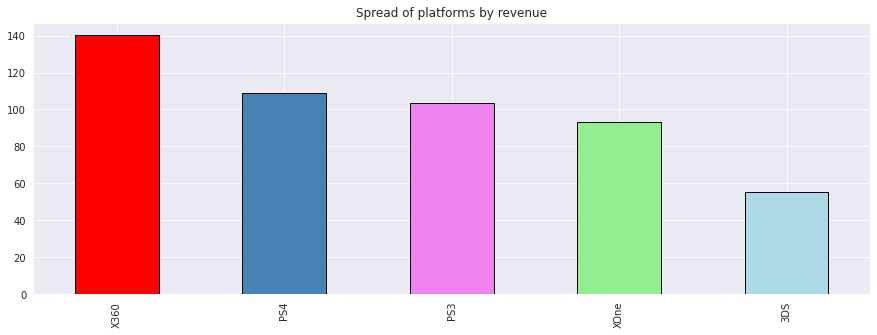

In [77]:
diag_plot(games_12_16, 'platform', 'na_sales')

In North America, the most popular platform is the X360 - where it comes from. At the same time, with the release of a new generation of consoles, the leadership goes to the PS4. 3DS is the least popular console among the leaders.

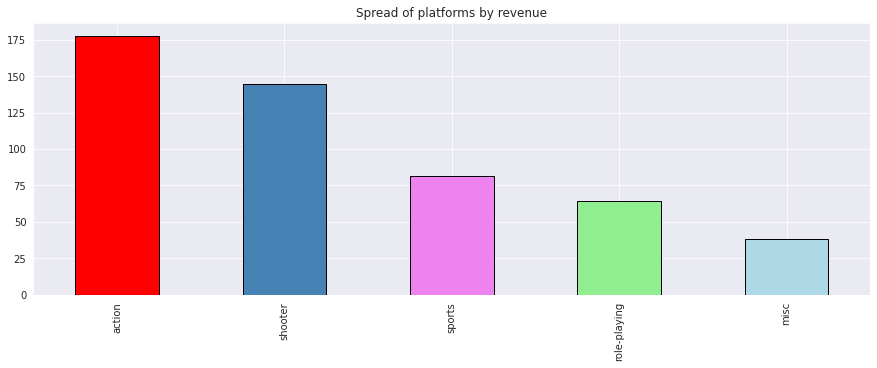

In [78]:
diag_plot(games_12_16, 'genre', 'na_sales')

As for genres, the most popular are action and shooter, closes the top three in the sport genre.

### Region EU

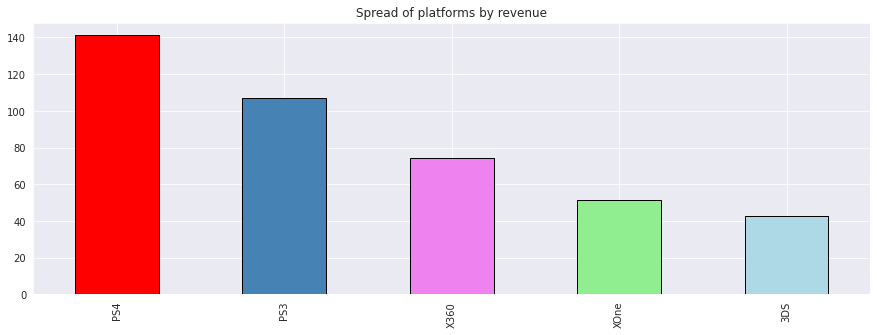

In [79]:
diag_plot(games_12_16, 'platform', 'eu_sales')


Among European users, PS4 and PS3 are leaders, Microsoft's console is much less successful than in North America

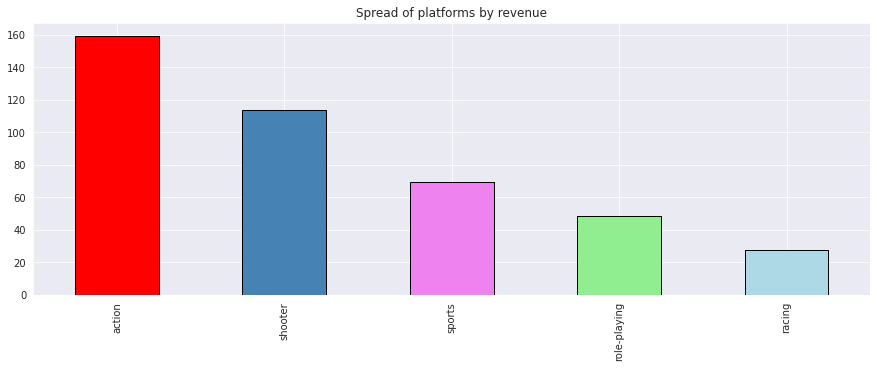

In [80]:
diag_plot(games_12_16, 'genre', 'eu_sales')

### Region JP

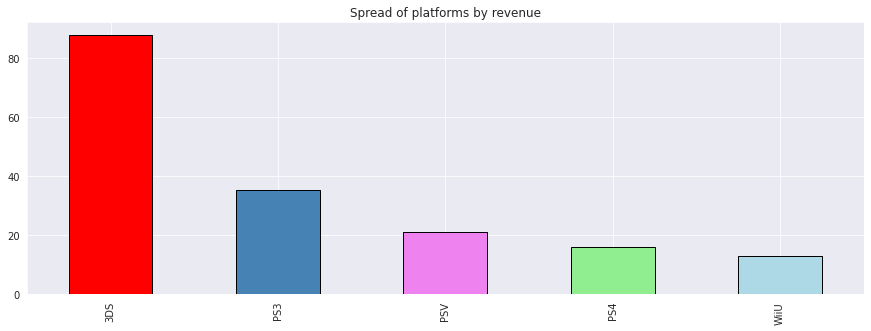

In [81]:
diag_plot(games_12_16, 'platform', 'jp_sales')

Japanese users prefer consoles from Nintendo and Sony. At the same time, as many as two portable consoles entered the top 5. Japanese users prefer local console makers

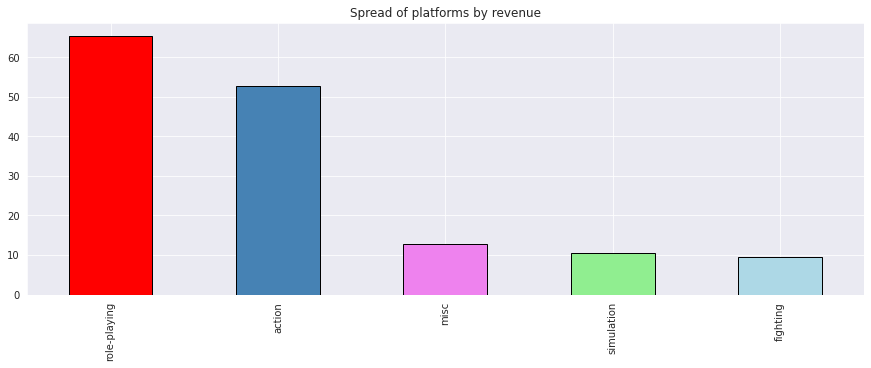

In [82]:
diag_plot(games_12_16, 'genre', 'jp_sales')

It is expected that Japanese users prefer RPGs (many famous RPGs originated from Japan, there is a separate subgenre - [jRPG](https://ru.wikipedia.org/wiki/%D0%AF%D0%BF%D0%BE%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%BE%D0%BB%D0%B5%D0%B2%D0%B0%D1%8F_%D0%B8%D0%B3%D1%80%D0%B0))followed by action.

If Europe and America are more or less similar in preference, then Japan clearly stands out at their level.
The Japanese often work a lot (over [60](https://rb.ru/story/karoshi/) hours per week) - with this approach - there will be no time for a home stationary console - perhaps that is why portable consoles are in the lead. In addition, Japanese housing is often small in size - choosing a portable platform will save space (there is no need to buy a monitor or TV and the console itself will not take up space)

As for RPGs, role-playing games offer the user immersion and passion for a long time, unlike shooters or action games, some immersion and juxtaposition of oneself and the character, which helps to distract from fatigue


### Impact of ESRB rating

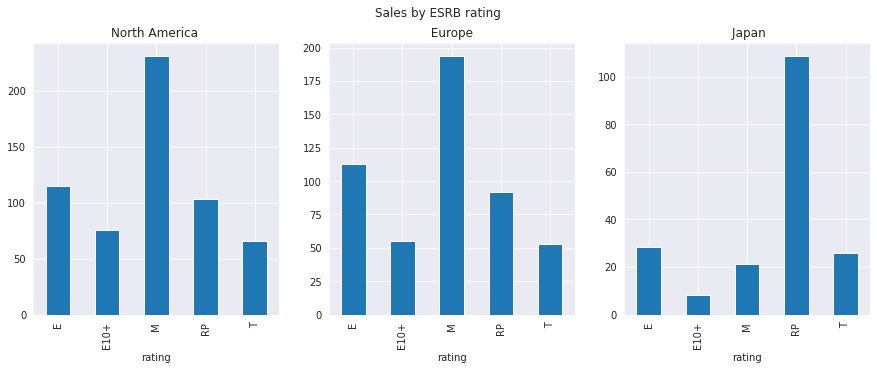

In [83]:
region_sales = ['na_sales', 'eu_sales', 'jp_sales']
regions = ['North America ',' Europe ',' Japan']


fig, ax = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Sales by ESRB rating')
for i, sale in enumerate(region_sales):
    for region in regions:
        games_12_16.groupby('rating')[sale].sum().plot(
                                                       kind='bar', ax=ax[i], title=regions[i]
                                                       
                                                      )
    

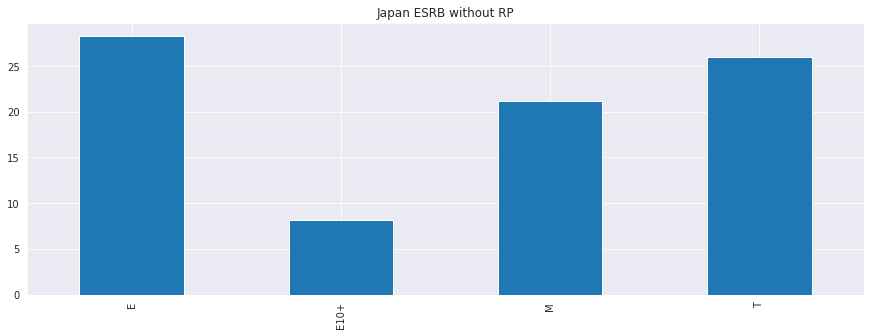

In [84]:
games_12_16.query('rating != "RP"').groupby('rating')['jp_sales'].sum().plot(kind='bar', figsize=(15,5))
plt.title('Japan ESRB without RP')
plt.xlabel('')
plt.show()

In North America and Europe, we see that the most popular games are marked with the "M" ("Mature"). If you remember what genres are popular in these regions (shooters and action games), we can say that users are teaching games with elements of violence (for example, games about military operations, games that support PVP modes (player-versus-player)). In Japan, many games are not rated. 3DS is not popular with users in other regions, so distributors are in no hurry to bring many games to markets. RPs aside, Japan's most popular games are rated for everyone - E.

### Conc


In North America, the most popular platform is the X360 - where it comes from. At the same time, with the release of a new generation of consoles, the leadership goes to the PS4. 3DS is the least popular console among the leaders.

Among European users, PS4 and PS3 are the leaders, Microsoft's console is much less successful than in North America, but both regions are similar in that 3ds is the least popular. 

Japanese users prefer consoles from Nintendo and Sony. At the same time, as many as two portable consoles entered the top 5. Japanese users prefer local console makers


In terms of genres, American and European users prefer M-rated action games and shooters, Japanese users prefer 3DS games and RPGs. Most often, games in Japan are either rated [RP or E](https://www.esrb.org/search/?searchKeyword=&platform=Nintendo%203DS&rating=E%2CE10%2B%2CT%2CM%2CAO&descriptor=All%20Content&pg=4&searchType=All)

## Testing Statistical Hypotheses

In [85]:
games_12_16.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Grand Theft Auto V,PS3,2013,action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,82.0,3994.0,Rockstar North,M
1,Grand Theft Auto V,X360,2013,action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,81.0,3711.0,Rockstar North,M
2,Call of Duty: Black Ops 3,PS4,2015,shooter,Activision,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN,NaN,NaN,RP
3,Pokemon X/Pokemon Y,3DS,2013,role-playing,Nintendo,5.28,4.19,4.35,0.78,14.60,NaN,NaN,NaN,NaN,NaN,RP
4,Call of Duty: Black Ops II,PS3,2012,shooter,Activision,4.99,5.73,0.65,2.42,13.79,83.0,21.0,53.0,922.0,Treyarch,M


### Average user ratings for Xbox One and PC platforms are the same


Let's see how the average user ratings of the Xbox One and PC platforms differ.
Let us construct hypotheses: Let us formulate it as a hypothesis about the equality of the means of two general populations

H0 (null hypothesis): Average user ratings for Xbox One and PC **platforms are equal**.

H1 (Alternative Hypothesis): Average user ratings for Xbox One and PC **platforms are not equal**.


To test the hypothesis that the mean of two populations is equal for the samples taken from them, apply the scipy.stats.ttest_ind (array1, array2, equal_var) method, taking the critical level of statistical significance alpha as .05

Let's start by evaluating our samples. This will allow us to figure out which parameter equal_var we should use in the Student's t test. Let's run Leuven's test and see if the variances of our samples differ.

In [86]:


xbox_gamers = games_12_16.query('platform == "XOne"')
pc_gamers = games_12_16.query('platform == "PC"')



sample_1 = xbox_gamers['user_score'][xbox_gamers['user_score'].notna()].tolist()
sample_2 = pc_gamers['user_score'][pc_gamers['user_score'].notna()].tolist()
alpha = .05
stat, p = st.levene(sample_1, sample_2)
result_levene = p



if result_levene < alpha:
    print('Reject H0, variances are different, equal_var = False for ttest ')
else:
    print("Do not reject H0, variances do not differ, equal_var = True for ttest")

var_sample = [np.var(x, ddof=1) for x in [sample_1, sample_2]]
print('Sample variances:', var_sample)


Reject H0, variances are different, equal_var = False for ttest 
Sample variances: [190.69968429360694, 277.04439971584185]


In [87]:


alpha = .05 
results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print('p-values:', results.pvalue)

if results.pvalue < alpha:
    print("reject Н0")
else:
    print("do not reject Н0")




p-values: 0.5489537965135056
do not reject Н0


We do not reject the null hypothesis:
The average user ratings for the Xbox One and PC platforms are equal.

Let's see the average values ​​and make sure of this

In [88]:
print('Average User Rating of XOne: {:.2f}'.format(
                                                      xbox_gamers['user_score'][xbox_gamers['user_score'].notna()].mean())
                                                      )
print('Average PC user rating: {:.2f}'.format(
                                                    pc_gamers['user_score'][pc_gamers['user_score'].notna()].mean())
                                                    )

Average User Rating of XOne: 65.21
Average PC user rating: 64.29


in our sample, the means are approximately equal

### Average user ratings for Action and Sports genres are different

Let's check how the average user ratings of the Action and Sports genres differ. Let us construct hypotheses: Let us formulate it as a hypothesis about the equality of the means of two general populations

H0 (null hypothesis): Average user ratings for Action and Sports genres are equal.

H1 (Alternative Hypothesis): The average user ratings for the Action and Sports genres are not equal.

To test the hypothesis that the mean of two populations is equal for the samples taken from them, apply the scipy.stats.ttest_ind (array1, array2, equal_var) method, taking the critical level of statistical significance alpha as .05

Let's start by evaluating our samples. This will allow us to figure out which parameter equal_var we should use in the Student's t test. Let's run Leuven's test and see if the variances of our samples differ.

In [89]:


action_gamers = games_12_16.query('genre == "action"')
sports_gamers = games_12_16.query('genre == "sports"')


sample_01 = action_gamers['user_score'][action_gamers['user_score'].notna()].tolist()
sample_02 = sports_gamers['user_score'][sports_gamers['user_score'].notna()].tolist()
alpha = .05
stat, p = st.levene(sample_01, sample_02)
result_levene = p


if result_levene < alpha:
    print('Reject H0, variances are different, equal_var = False for ttest ')
else:
    print("Do not reject H0, variances do not differ, equal_var = True for ttest")

var_sample_1 = [np.var(x, ddof=1) for x in [sample_1, sample_2]]
print('Sample variances:', var_sample_1)

Reject H0, variances are different, equal_var = False for ttest 
Sample variances: [190.69968429360694, 277.04439971584185]


In [90]:


alpha = .05 
results = st.ttest_ind(sample_01, sample_02, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("reject Н0")
else:
    print("do not reject Н0")




p-value: 4.243077765726105e-20
reject Н0


We reject the null hypothesis. Most likely, the statement is true:
Average user ratings for Action and Sports genres are not equal

Let's see our sample averages:

In [91]:
print('Average User Action Rating: {:.2f}'.format(
                                                        action_gamers['user_score'][action_gamers['user_score'].notna()].mean())
                                                        )
print('Average Sports User Rating:{:.2f}'.format(
                                                        sports_gamers['user_score'][sports_gamers['user_score'].notna()].mean())
                                                         )

Average User Action Rating: 68.25
Average Sports User Rating:54.56


## Conc

Based on the results of the analysis of the data provided for 2016, the current period for study was taken: from 2012 to 2016


** Promising platforms are Playstation 4 and Xbox One (for 2017-2020 (which were not presented)) **. Nintendo's 3DS should only be considered if targeting the Japanese market. For the domestic market, the results of the European study are applicable. Accordingly, ** promising genres will be action and shooter with an M rating ** and a high rating from critics - such games will most likely be in demand. Sports games are also popular - they should also be considered for marketing.

The PC is less promising than the consoles at the moment, which may be due to the development of online services for buying games - that is, the need for physical media disappears.

It is worth noting that the average user rating is platform independent. If the product is of high quality, then the platform of the game does not matter.


